In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
import  math
import pickle

from sklearn.feature_selection import RFE
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn import metrics
from matplotlib import rcParams
from matplotlib import pyplot
from xgboost import plot_importance
from numpy import sort
from numpy import loadtxt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.lines as mlines
from sklearn.tree import DecisionTreeClassifier

In [80]:
cnv_types = ['loss', 'gain']
cnv_type = cnv_types[0]

x_train_f = './data_annotsv/train_val_test_sets/train_val_test/x_train_' + cnv_type + '.tsv'
y_train_f = './data_annotsv/train_val_test_sets/train_val_test/y_train_' + cnv_type + '.tsv'
x_val_f = './data_annotsv/train_val_test_sets/train_val_test/x_val_'+ cnv_type + '.tsv'
y_val_f = './data_annotsv/train_val_test_sets/train_val_test/y_val_'+ cnv_type + '.tsv'
x_test_f = './data_annotsv/train_val_test_sets/train_val_test/x_test_' + cnv_type + '.tsv'
y_test_f = './data_annotsv/train_val_test_sets/train_val_test/y_test_'+ cnv_type + '.tsv'

x_train = pd.read_csv(x_train_f, sep='\t')
y_train = pd.read_csv(y_train_f, sep='\t')
x_val = pd.read_csv(x_val_f, sep='\t')
y_val = pd.read_csv(y_val_f, sep='\t')
x_test = pd.read_csv(x_test_f, sep='\t')
y_test = pd.read_csv(y_test_f, sep='\t')

ATTRIBUTES_TO_USE = [
    'morbidGene_count', 
    'min_D_Frequency_3',
    'ExAC_zScore_indel',
    'ExAC_zScore_pLI',
    'HI_DDDperc_haploinsufficient_gene_count',
    'CGscore_indel_gene_count_2', 
    'gene_count',
    #'promoters_count',
    'length'
]
x_train = x_train[ATTRIBUTES_TO_USE]
x_val = x_val[ATTRIBUTES_TO_USE]
x_test = x_test[ATTRIBUTES_TO_USE]

y_train = y_train.clinsig_bin
y_val = y_val.clinsig_bin
y_test = y_test.clinsig_bin

In [81]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

model_to_f = './results_isv_annotsv/models/xgb_'+ cnv_type + '.plk'
pickle.dump(xgb_clf, open(model_to_f, 'wb'))

xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
xgb_clf = pickle.load(open(model_to_f, 'rb'))
xgb_clf
print('Train_accuracy:', accuracy_score(y_train, xgb_clf.predict(x_train)), 'Train_precision:', metrics.precision_score(y_train, xgb_clf.predict(x_train)))
print('Val_accuracy:', accuracy_score(y_val, xgb_clf.predict(x_val)), 'Val_precision:', metrics.precision_score(y_val, xgb_clf.predict(x_val)))
print('Test_accuracy:', accuracy_score(y_test, xgb_clf.predict(x_test)), 'Test_precision:', metrics.precision_score(y_test, xgb_clf.predict(x_test)))


Train_accuracy: 0.9848150661689854 Train_precision: 0.9866212600340549
Val_accuracy: 0.9627870150435471 Val_precision: 0.944078947368421
Test_accuracy: 0.9619952494061758 Test_precision: 0.9532497149372862


In [3]:
ATTRIBUTES = [
 'misZ_ExAC',
 'pLI_ExAC',
 'CGscore_indel_gene_count_2',
 'CGscore_indel_gene_count',
 'TriS_CGscore',
 'synZ_ExAC',
 'HI_CGscore',
 'gene_count',
 'promoters_count',
 'min_D_Frequency_3',
 'DGV_LOSS_Frequency',
 'HI_DDDpercent',
 'IMH_AF',
 'length',
 'morbidGene_count',
 '1000g_AF',
 '1000g_max_AF',
 'GD_POPMAX_AF',
 'GD_AF',
 'ExAC_zScore_pLI',
 'cnvZ_ExAC',
 'delZ_ExAC',
 'dupZ_ExAC',
 'DGV_LOSS_n_samples_tested',
 'ExAC_zScore_indel',
 'ExAc_zScore_cnv',
#  'Unnamed: 0',
#  'Unnamed: 0.1',
 'DGV_GAIN_Frequency',
 'min_D_Frequency_2',
 'DGV_LOSS_n_samples_with_SV',
 'id',
 'DGV_GAIN_n_samples_tested',
#  'start_grch37',
#  'stop_ncbi36',
#  'SV_start',
 'HI_DDDperc_haploinsufficient_gene_count',
 'DGV_GAIN_n_samples_with_SV',
#  'stop_grch37',
#  'start_ncbi36',
#  'SV_end'
]

In [36]:
ATTRIBUTES_TO_USE = [
    'morbidGene_count', 
    'min_D_Frequency_3',
    'ExAC_zScore_indel',
    'ExAC_zScore_pLI',
    'HI_DDDperc_haploinsufficient_gene_count',
    'CGscore_indel_gene_count_2', 
    'gene_count',
    #'promoters_count',
    'length'
]


In [37]:
x_train = x_train[ATTRIBUTES_TO_USE]
x_val = x_val[ATTRIBUTES_TO_USE]
x_test = x_test[ATTRIBUTES_TO_USE]

y_train = y_train.clinsig_bin
y_val = y_val.clinsig_bin
y_test = y_test.clinsig_bin

In [18]:
moethod_diff = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision'])
x.append(pd.DataFrame([[1, 2, 3]], columns=['Method', 'Accuracy', 'Precision']))

,Method,Accuracy,Precision
0,1,2,3


In [35]:
x = [RandomForestClassifier]
m = x[0]()
m.fit(x_train, y_train['clinsig_bin'])

RandomForestClassifier()

In [37]:
accuracy_score(y_val.clinsig_bin, m.predict(x_val))

0.967061435973353

Vyskusanie roznych klasifikacnych metod 

In [12]:
methods_dict = {'LogisticRegression':LogisticRegression,
                'SVC' : svm.SVC,
                'linearSVC' : svm.LinearSVC,
                'KNeighborsClassifier' : KNeighborsClassifier,
                'XGBoostClf':XGBClassifier,
                'RandomForestClf' : RandomForestClassifier,
                'GradientBoostingClf' : GradientBoostingClassifier,
                'AdaBoostClf' : AdaBoostClassifier
               }

cols_metrics = ['CNV_type', 'Dataset', 'Method', 'TN', 'FP', 'FN', 'TP', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity']
# method_diff = pd.DataFrame(columns=cols_metrics)

for method in methods_dict:
    model = methods_dict[method]()
    model.fit(x_train, y_train)
    datasets = ['train', 'validation', 'test']
    for dataset in datasets:
        if dataset == 'train':
            y_true = y_train
            model_prediction = model.predict(x_train)
        elif dataset == 'validation':
            y_true = y_val
            model_prediction = model.predict(x_val)
        else:
            y_true = y_test
            model_prediction = model.predict(x_test)

        TN, FP, FN, TP = metrics.confusion_matrix(y_true, model_prediction).ravel()
        accuracy = (TP + TN)/(TP + TN + FP + FN)
        precision = TP / (TP + FP)
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP)
        method_diff = method_diff.append(pd.DataFrame([[cnv_type, dataset, method, TN, FP, FN, TP, accuracy, precision, sensitivity, specificity]], 
                            columns = cols_metrics), ignore_index=True)
    
    

/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
method_diff.sort_values(by='Accuracy')

,CNV_type,Dataset,Method,TN,FP,FN,TP,Accuracy,Precision,Sensitivity,Specificity
25,gain,validation,LogisticRegression,0,1385,0,423,0.233960,0.233960,1.000000,0.000000
26,gain,test,LogisticRegression,0,1380,0,428,0.236726,0.236726,1.000000,0.000000
24,gain,train,LogisticRegression,0,6417,0,2019,0.239331,0.239331,1.000000,0.000000
2,loss,test,LogisticRegression,0,1635,0,891,0.352732,0.352732,1.000000,0.000000
0,loss,train,LogisticRegression,0,7608,0,4180,0.354598,0.354598,1.000000,0.000000
1,loss,validation,LogisticRegression,0,1622,0,904,0.357878,0.357878,1.000000,0.000000
7,loss,validation,linearSVC,1622,0,904,0,0.642122,NaN,0.000000,1.000000
6,loss,train,linearSVC,7608,0,4180,0,0.645402,NaN,0.000000,1.000000
8,loss,test,linearSVC,1635,0,891,0,0.647268,NaN,0.000000,1.000000
30,gain,train,linearSVC,6416,1,2019,0,0.760550,0.000000,0.000000,0.999844


In [8]:
method_diff.sort_values(by='Accuracy')

,CNV_type,Dataset,Method,TN,FP,FN,TP,Accuracy,Precision,Sensitivity,Specificity
2,loss,test,LogisticRegression,0,1818,0,884,0.327165,0.327165,1.000000,0.000000
1,loss,validation,LogisticRegression,0,1813,0,889,0.329016,0.329016,1.000000,0.000000
0,loss,train,LogisticRegression,0,8371,0,4238,0.336109,0.336109,1.000000,0.000000
6,loss,train,linearSVC,7772,599,2233,2005,0.775399,0.769969,0.473101,0.928443
7,loss,validation,linearSVC,1704,109,477,412,0.783124,0.790787,0.463442,0.939879
8,loss,test,linearSVC,1692,126,446,438,0.788305,0.776596,0.495475,0.930693
10,loss,validation,KNeighborsClassifier,1722,91,202,687,0.891562,0.883033,0.772778,0.949807
4,loss,validation,SVC,1769,44,244,645,0.893412,0.936139,0.725534,0.975731
3,loss,train,SVC,8154,217,1080,3158,0.897137,0.935704,0.745163,0.974077
11,loss,test,KNeighborsClassifier,1741,77,193,691,0.900074,0.899740,0.781674,0.957646


In [ ]:
method_diff.sort_values(by='Accuracy').to_c

In [58]:
method_diff # s promotormi

,CNV_type,Dataset,Method,TN,FP,FN,TP,Accuracy,Precision,Sensitivity,Specificity
0,gain,train,LogisticRegression,0,6536,0,2045,0.238317,0.238317,1.000000,0.000000
1,gain,validation,LogisticRegression,0,1418,0,421,0.228929,0.228929,1.000000,0.000000
2,gain,test,LogisticRegression,0,1433,0,406,0.220772,0.220772,1.000000,0.000000
3,gain,train,SVC,6455,81,527,1518,0.929146,0.949343,0.742298,0.987607
4,gain,validation,SVC,1399,19,112,309,0.928766,0.942073,0.733967,0.986601
5,gain,test,SVC,1419,14,105,301,0.935291,0.955556,0.741379,0.990230
6,gain,train,linearSVC,5814,722,1157,888,0.781028,0.551553,0.434230,0.889535
7,gain,validation,linearSVC,1236,182,261,160,0.759108,0.467836,0.380048,0.871650
8,gain,test,linearSVC,1294,139,255,151,0.785753,0.520690,0.371921,0.903001
9,gain,train,KNeighborsClassifier,6400,136,312,1733,0.947792,0.927234,0.847433,0.979192


In [14]:
method_diff.to_csv('./results_isv_annotsv/models/methods_compare_withoutPromoters.tsv', sep='\t', index=False)

In [19]:
method_diff = pd.read_csv('./results_isv_annotsv/models/methods_compare_withoutPromoters.tsv', sep='\t')


In [18]:
method_diff = method_diff[method_diff.CNV_type == 'loss']
method_diff = method_diff[method_diff.Dataset == 'test']
method_diff.sort_values(by='Accuracy')
# u delecii vyhrava vo vsetkych setoch RandomForestClf
# u duplikacii vyhrava xgboost iba na testovacom sete


,CNV_type,Dataset,Method,TN,FP,FN,TP,Accuracy,Precision,Sensitivity,Specificity
26,loss,test,LogisticRegression,0,1818,0,884,0.327165,0.327165,1.000000,0.000000
32,loss,test,linearSVC,1793,25,862,22,0.671725,0.468085,0.024887,0.986249
35,loss,test,KNeighborsClassifier,1741,77,193,691,0.900074,0.899740,0.781674,0.957646
29,loss,test,SVC,1784,34,232,652,0.901554,0.950437,0.737557,0.981298
47,loss,test,AdaBoostClf,1760,58,95,789,0.943375,0.931523,0.892534,0.968097
44,loss,test,GradientBoostingClf,1792,26,98,786,0.954108,0.967980,0.889140,0.985699
38,loss,test,XGBoostClf,1782,36,71,813,0.960400,0.957597,0.919683,0.980198
41,loss,test,RandomForestClf,1785,33,67,817,0.962990,0.961176,0.924208,0.981848


Vytvorenie grafov 

In [15]:
methods_dict = {'LogisticRegression':LogisticRegression,
                'SVC' : svm.SVC,
                'DecisionTree': DecisionTreeClassifier,
                'linearSVC' : svm.LinearSVC,
                'KNeighborsClassifier' : KNeighborsClassifier,
                'XGBoostClf':XGBClassifier,
                'RandomForestClf' : RandomForestClassifier,
                'GradientBoostingClf' : GradientBoostingClassifier,
                'AdaBoostClf' : AdaBoostClassifier
               }

cols_metrics = ['CNV_type', 'Method', 'Accuracy_train','Accuracy_val', 'Precision_train', 'Precision_val', 'Accuracy_test']
method_diff = pd.DataFrame(columns=cols_metrics)

for method in methods_dict:
    model = methods_dict[method]()
    model.fit(x_train, y_train)

    TN, FP, FN, TP = metrics.confusion_matrix(y_train, model.predict(x_train)).ravel()
    accuracy_train = ((TP + TN)/(TP + TN + FP + FN))*100
    precision_train = (TP / (TP + FP))*100
    TN, FP, FN, TP = metrics.confusion_matrix(y_val, model.predict(x_val)).ravel()
    accuracy_val = ((TP + TN)/(TP + TN + FP + FN))*100
    precision_val = (TP / (TP + FP))*100
    acc_test = metrics.accuracy_score(y_test, model.predict(x_test))*100
    method_diff = method_diff.append(pd.DataFrame([[cnv_type, method, accuracy_train, accuracy_val, precision_train, precision_val, acc_test]], 
                            columns = cols_metrics), ignore_index=True)
    
    

/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars


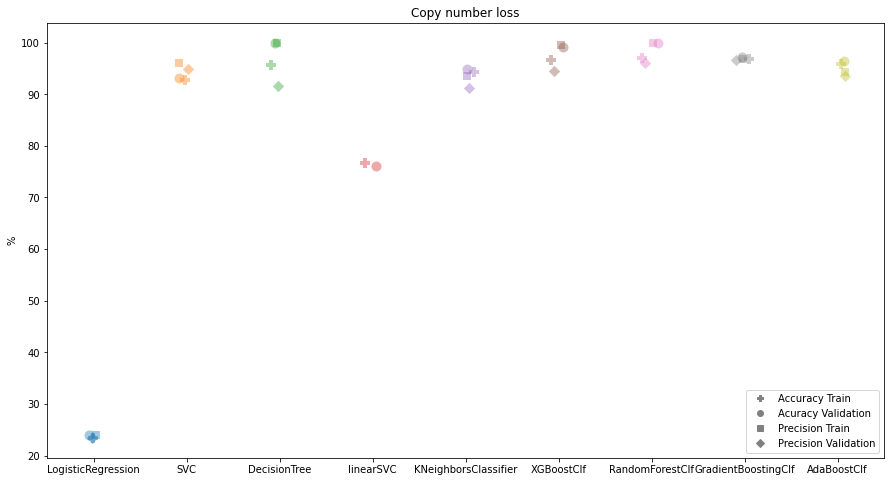

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))#(14, 6))
sns.stripplot(x='Method', y='Accuracy_train', data=method_diff, marker='o', size=10, alpha=0.4)
sns.stripplot(x='Method', y='Accuracy_val', data=method_diff, marker='P', size=10, alpha=0.4)
sns.stripplot(x='Method', y='Precision_train', data=method_diff, marker='s', size=8, alpha=0.4)
sns.stripplot(x='Method', y='Precision_val', data=method_diff, marker='D', size=8, alpha=0.4)
# sns.stripplot(x='Method', y='Accuracy_test', data=method_diff, marker='>', size=10, alpha=0.4)

acc_tr = mlines.Line2D([], [], color='grey', marker='P', label='Accuracy Train', linestyle='None')
acc_v = mlines.Line2D([], [], color='grey', marker='o', label='Acuracy Validation', linestyle='None')
prec_tr = mlines.Line2D([], [], color='grey', marker='s', label='Precision Train', linestyle='None')
prec_v = mlines.Line2D([], [], color='grey', marker='D', label='Precision Validation', linestyle='None')
# acc_ts = mlines.Line2D([], [], color='grey', marker='>', label='Accuracy Test', linestyle='None')


plt.legend(handles=[acc_tr, acc_v, prec_tr, prec_v], loc='lower right')
plt.ylabel('%')
plt.xlabel(None)
plt.title('Copy number ' + cnv_type)
fn_to_savefig = './results_isv_annotsv/models/models_accuracy_'+ cnv_type +'.jpg'
plt.savefig(fn_to_savefig, dpi=300, format='jpg', bbox_inches = 'tight', facecolor='white')

In [37]:
method_diff.sort_values(by='Accuracy_test')

,CNV_type,Method,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Accuracy_test
0,gain,LogisticRegression,23.831721,22.892877,23.831721,22.892877,22.077216
3,gain,linearSVC,76.576157,76.780859,52.212389,48.125000,78.738445
4,gain,KNeighborsClassifier,94.779163,92.822186,92.723381,86.034913,93.257205
1,gain,SVC,92.914579,92.876563,94.934334,94.207317,93.529092
2,gain,DecisionTree,99.988346,96.628603,99.951124,93.253012,96.247961
8,gain,AdaBoostClf,96.702016,97.117999,96.911608,96.231156,96.954867
7,gain,GradientBoostingClf,97.366274,97.226754,97.345133,96.482412,97.281131
5,gain,XGBoostClf,99.114322,97.716150,99.497235,96.332518,97.335508
6,gain,RandomForestClf,99.988346,97.661773,99.951124,96.097561,97.444263


In [124]:
method_diff

,CNV_type,Method,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Accuracy_test
0,loss,LogisticRegression,33.610913,32.901554,33.610913,32.901554,32.716506
1,loss,SVC,89.713697,89.341229,93.570370,93.613933,90.155440
2,loss,linearSVC,66.262194,67.135455,36.666667,54.545455,67.024426
3,loss,KNeighborsClassifier,91.981918,89.156181,92.538887,88.303342,90.007402
4,loss,XGBoostClf,98.572448,96.262028,98.471094,95.601852,96.039970
5,loss,RandomForestClf,99.968277,96.817172,100.000000,96.309112,96.150999
6,loss,GradientBoostingClf,95.669760,95.410807,96.522177,96.589525,95.410807
7,loss,AdaBoostClf,94.416686,94.337528,92.805233,93.091335,94.337528


In [44]:
method_diff

,CNV_type,Method,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Accuracy_test
0,loss,LogisticRegression,33.610913,32.901554,33.610913,32.901554,32.716506
1,loss,SVC,89.713697,89.341229,93.570370,93.613933,90.155440
2,loss,DecisionTree,99.968277,95.262768,100.000000,92.897407,94.300518
3,loss,linearSVC,66.214609,67.098446,35.526316,50.000000,66.913397
4,loss,KNeighborsClassifier,91.981918,89.156181,92.538887,88.303342,90.007402
5,loss,XGBoostClf,98.572448,96.262028,98.471094,95.601852,96.039970
6,loss,RandomForestClf,99.968277,96.410067,99.929245,95.939675,96.225019
7,loss,GradientBoostingClf,95.669760,95.410807,96.522177,96.589525,95.410807
8,loss,AdaBoostClf,94.416686,94.337528,92.805233,93.091335,94.337528


In [ ]:
# Train  model

In [41]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train.clinsig_bin)
print('Train_accuracy:', accuracy_score(y_train.clinsig_bin, xgb_clf.predict(x_train)), 'Train_precision:', metrics.precision_score(y_train.clinsig_bin, xgb_clf.predict(x_train)))
print('Val_accuracy:', accuracy_score(y_val.clinsig_bin, xgb_clf.predict(x_val)), 'Val_precision:', metrics.precision_score(y_val.clinsig_bin, xgb_clf.predict(x_val)))
print('Test_accuracy:', accuracy_score(y_test.clinsig_bin, xgb_clf.predict(x_test)), 'Test_precision:', metrics.precision_score(y_test.clinsig_bin, xgb_clf.predict(x_test)))


AttributeError: 'Series' object has no attribute 'clinsig_bin'

In [53]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)
print('Train_accuracy:', accuracy_score(y_train, xgb_clf.predict(x_train)), 'Train_precision:', metrics.precision_score(y_train, xgb_clf.predict(x_train)))
print('Val_accuracy:', accuracy_score(y_val, xgb_clf.predict(x_val)), 'Val_precision:', metrics.precision_score(y_val, xgb_clf.predict(x_val)))
print('Test_accuracy:', accuracy_score(y_test, xgb_clf.predict(x_test)), 'Test_precision:', metrics.precision_score(y_test, xgb_clf.predict(x_test)))


Train_accuracy: 0.9924134660976767 Train_precision: 0.9944360141628731
Val_accuracy: 0.9657079646017699 Val_precision: 0.945679012345679
Test_accuracy: 0.9728982300884956 Test_precision: 0.9479905437352246


# RFE

In [12]:
x_train = x_train.select_dtypes(include=np.number) # 12610 rows × 9 

In [54]:
rfe = RFE(xgb_clf, 1)
rfe = rfe.fit(x_train, y_train)
fi = pd.concat([pd.DataFrame(rfe.ranking_, columns=['RFE_importance']), pd.DataFrame(ATTRIBUTES_TO_USE, columns=['Feature']), pd.DataFrame(xgb_clf.feature_importances_, columns=['feature_importance'])], axis = 1)
fi = fi.sort_values(by='RFE_importance',ascending=True)
fi = fi.sort_values(by='feature_importance',ascending=False)
fi.columns = ['RFE_importance', 'Attribute', 'feature_importance']
fi

/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


,RFE_importance,Attribute,feature_importance
4,1,gene_count,0.588524
3,3,ExAC_zScore_pLI,0.136841
0,2,morbidGene_count,0.130124
5,4,length,0.070005
2,5,ExAC_zScore_indel,0.038139
1,6,min_D_Frequency_3,0.036367


In [52]:
x_train

,morbidGene_count,min_D_Frequency_3,ExAC_zScore_indel,ExAC_zScore_pLI,gene_count,length
0,0,0.001204,-10.000000,0,1,274098
1,0,-1.000000,-2.531252,0,6,184409
2,0,-1.000000,-10.000000,0,20,3513243
3,0,-1.000000,-0.968080,1,2,75053
4,0,0.000566,0.855452,0,2,121283
...,...,...,...,...,...,...
8431,0,-1.000000,-10.000000,0,8,936049
8432,0,0.002991,-2.531252,0,2,196497
8433,1,-1.000000,0.527083,0,18,263993
8434,0,-1.000000,-2.531252,0,37,926326


In [45]:
fi = fi.sort_values(by='feature_importance',ascending=False)
fi.columns = ['RFE_importance', 'Attribute', 'feature_importance']
fi

,RFE_importance,Attribute,feature_importance
5,2,CGscore_indel_gene_count_2,0.321017
0,1,morbidGene_count,0.244952
7,3,length,0.191918
3,4,ExAC_zScore_pLI,0.102687
1,5,min_D_Frequency_3,0.056643
6,6,gene_count,0.036164
2,7,ExAC_zScore_indel,0.030735
4,8,HI_DDDperc_haploinsufficient_gene_count,0.015885


In [55]:
fi_f = './results_isv_annotsv/attributes_selection/feature_importance_'+ cnv_type +'_len1000.tsv'
fi.to_csv(fi_f, sep='\t', index=False)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontw

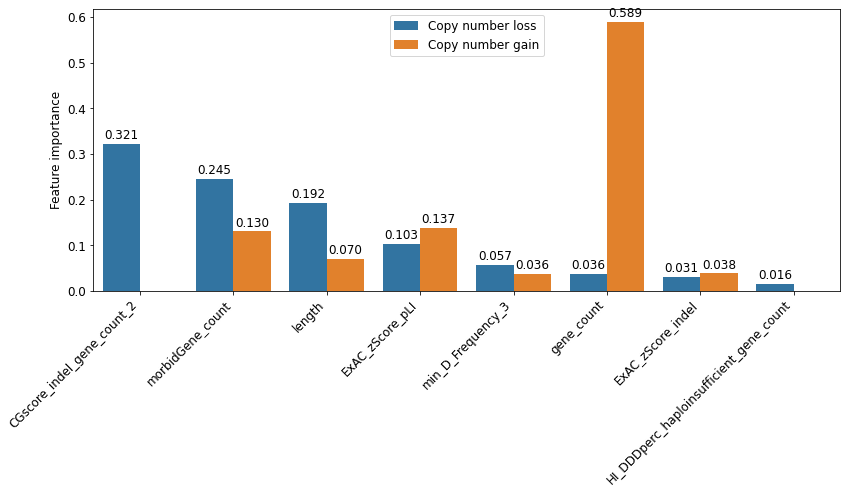

In [56]:
loss_fi = pd.read_csv('./results_isv_annotsv/attributes_selection/feature_importance_loss_len1000.tsv', sep='\t')
gain_fi = pd.read_csv('./results_isv_annotsv/attributes_selection/feature_importance_gain_len1000.tsv', sep='\t')

loss_fi['CNV_type'] = 'Copy number loss'
gain_fi['CNV_type'] = 'Copy number gain'

fi_con = pd.concat([loss_fi, gain_fi])

rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12, 7))
splot = sns.barplot(x='Attribute', y='feature_importance', data = fi_con, hue='CNV_type')

# for index, row in fi_con.iterrows():
#     g.text(row.Attribute,row.feature_importance, round(row.feature_importance,2), color='black', ha="center")

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.set_xlabel(''))
plt.setp(ax.legend(title=None) )
plt.setp(ax.set_ylabel('Feature importance'))
fig.tight_layout()
fn_to_savefig = './results_isv_annotsv/attributes_selection/feature_importance_attributes_loss_gain_len1000_barplot.jpg'
plt.savefig(fn_to_savefig, dpi=350, format='jpg', bbox_inches = 'tight', facecolor='white')
plt.show()

# point biserial coef

/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontw

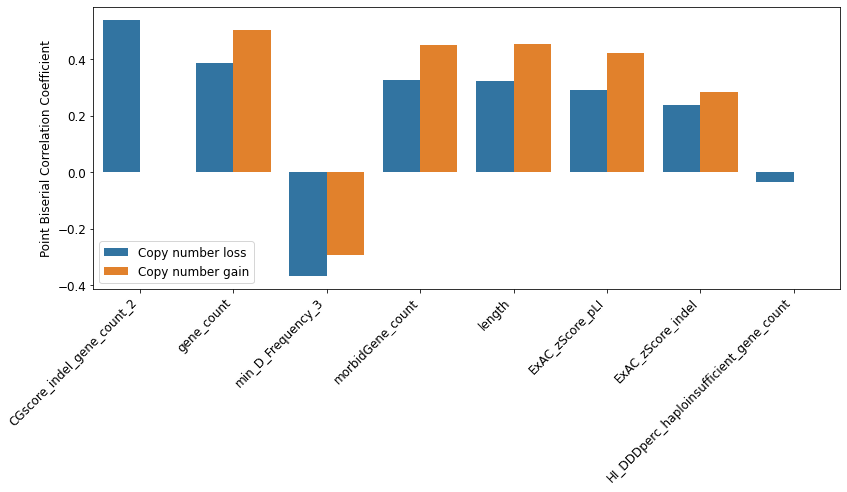

In [59]:

cnv_types = ['loss', 'gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test/x_train_' + cnv_type + '.tsv'
    data = pd.read_csv(data_train_fn, sep='\t')

    biserial_correlation_clinsig_cnv_specific = pd.DataFrame()
    i=0
    
    for atr in ATTRIBUTES_TO_USE:
        data_to_corr = data[['clinsig_bin', atr]]
        data_to_corr = data_to_corr.dropna()
        if data_to_corr.shape[0] > 0:
            korelacia = stats.pointbiserialr(data_to_corr['clinsig_bin'], data_to_corr[atr]).correlation
            biserial_correlation_clinsig_cnv_specific.at[i, 'PointBiserialCoefficient'] = korelacia
            biserial_correlation_clinsig_cnv_specific.at[i, 'AttributeName'] = atr
            i+=1

    biserial_correlation_clinsig_cnv_specific = biserial_correlation_clinsig_cnv_specific.reindex(biserial_correlation_clinsig_cnv_specific.PointBiserialCoefficient.abs().sort_values(ascending=False).index)

    biserial_correlation_clinsig_cnv_specific_fn = './results_isv_annotsv/attributes_selection/pointBiserialCorrelation_used_attributes_'+ cnv_type +'_len1000.tsv'
    biserial_correlation_clinsig_cnv_specific.to_csv(biserial_correlation_clinsig_cnv_specific_fn, sep='\t', index=False)


loss_biserial_correlation_clinsig_cnv_specific = pd.read_csv('./results_isv_annotsv/attributes_selection/pointBiserialCorrelation_used_attributes_loss_len1000.tsv', sep='\t')
gain_biserial_correlation_clinsig_cnv_specific = pd.read_csv('./results_isv_annotsv/attributes_selection/pointBiserialCorrelation_used_attributes_gain_len1000.tsv', sep='\t')

loss_biserial_correlation_clinsig_cnv_specific['CNV_type'] = 'Copy number loss'
gain_biserial_correlation_clinsig_cnv_specific['CNV_type'] = 'Copy number gain'

pcb = pd.concat([loss_biserial_correlation_clinsig_cnv_specific, gain_biserial_correlation_clinsig_cnv_specific])

rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='AttributeName', y='PointBiserialCoefficient', data = pcb, hue='CNV_type')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax.set_xlabel(''))
plt.setp(ax.legend(title=None) )
plt.setp(ax.set_ylabel('Point Biserial Correlation Coefficient'))
fig.tight_layout()
fn_to_savefig = './results_isv_annotsv/attributes_selection/pointBiserialCorrelation_loss_gain_barplot_len1000.jpg'
plt.savefig(fn_to_savefig, dpi=350, format='jpg', bbox_inches = 'tight', facecolor='white')
plt.show()

# Ako sa podla RFE a PoinBiserialCoef sa zlepsuje presnost?

In [60]:
# Ako sa zlepsuje accuracy pridavanim atributov podla point biserial correlation coeficient
cnv_types = ['loss', 'gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test/x_train_' + cnv_type + '.tsv'
    data_train = pd.read_csv(data_train_fn, sep='\t')
    data_val_fn = './data_annotsv/train_val_test_sets/train_val_test/x_val_' + cnv_type + '.tsv'
    data_val = pd.read_csv(data_val_fn, sep='\t')
    
    biserial_correlation_clinsig_fn = './results_isv_annotsv/attributes_selection/pointBiserialCorrelation_used_attributes_'+ cnv_type +'_len1000.tsv'
    biserial_correlation_clinsig = pd.read_csv(biserial_correlation_clinsig_fn, sep='\t')
    attributes_all = list(biserial_correlation_clinsig.AttributeName)
    
    trainig_selected_attributes_accuracy = pd.DataFrame()
    attributes_to_use = []
    for attr_to_add in attributes_all:
        attributes_to_use.append(attr_to_add)
        
        x_train = data_train[attributes_to_use]
        y_train = data_train.clinsig_bin

        x_val = data_val[attributes_to_use]
        y_val = data_val.clinsig_bin
        

        xgb_clf = XGBClassifier()
        xgb_clf.fit(x_train, y_train)

        l = str(len(attributes_to_use))
        trainig_selected_attributes_accuracy.at[l, 'TrainAccuracy'] = accuracy_score(y_train, xgb_clf.predict(x_train))
        trainig_selected_attributes_accuracy.at[l, 'TrainPrecision'] = metrics.precision_score(y_train, xgb_clf.predict(x_train))
        
        trainig_selected_attributes_accuracy.at[l, 'ValidationAccuracy'] = accuracy_score(y_val, xgb_clf.predict(x_val))
        trainig_selected_attributes_accuracy.at[l, 'ValidationPrecision'] = metrics.precision_score(y_val, xgb_clf.predict(x_val))

    # vytvor stlpec pre pocet pouzitych atributov
    trainig_selected_attributes_accuracy['NumberOfAttributes'] = trainig_selected_attributes_accuracy.index
    trainig_selected_attributes_accuracy_fn = './results_isv_annotsv/attributes_selection/pointBiserialCorrelation_trainig_selected_attributes_accuracy_'+ cnv_type +'_len1000.tsv'
    trainig_selected_attributes_accuracy.to_csv(trainig_selected_attributes_accuracy_fn, sep='\t', index=False)

/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


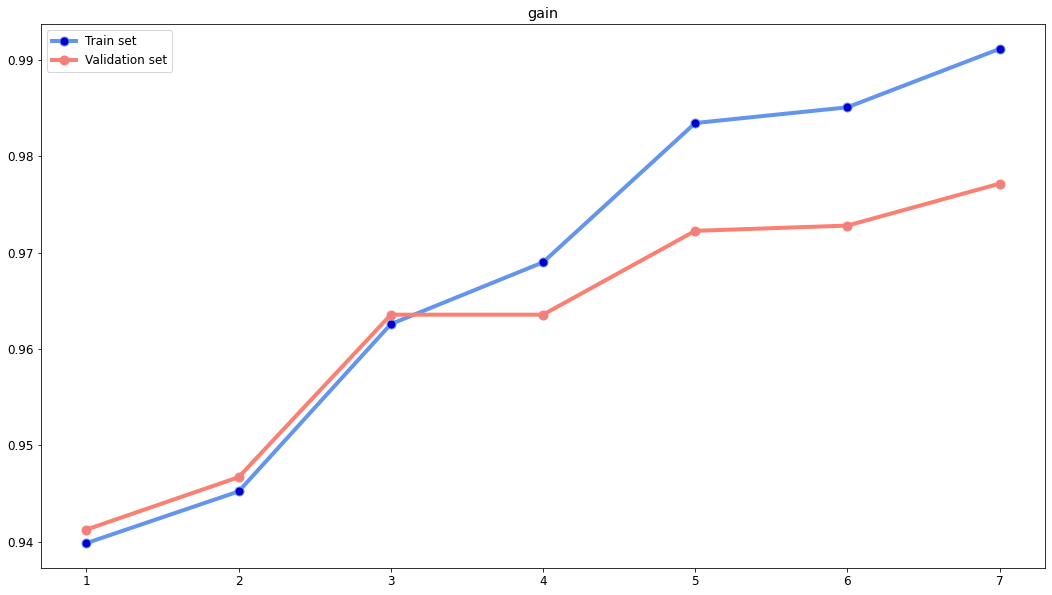

In [20]:
# zvizualizuj na grafe:
plt.figure(figsize=(18, 10))
plt.yticks(np.arange(0.8, 1.2, 0.01))
plt.plot( 'NumberOfAttributes', 'TrainAccuracy', data=trainig_selected_attributes_accuracy, marker='o', markerfacecolor='mediumblue', markersize=9, color='cornflowerblue', linewidth=4, label = 'Train set')
plt.plot( 'NumberOfAttributes', 'ValidationAccuracy', data=trainig_selected_attributes_accuracy, marker='o', markerfacecolor='lightcoral', markersize=9, color='salmon', linewidth=4, label = 'Validation set')
plt_title = str(cnv_type)
plt.title(plt_title)
plt.legend()

# fn_to_savefig = './attributes_correlations_fin/cnv_speci_attributy/cnv_speci_atrributes_to_use/pointBiserialCorrelation_trainig_selected_attributes_accuracy_'+ cnv_type +'.svg'

# plt.savefig(fn_to_savefig, dpi=300, format='svg', bbox_inches = 'tight', facecolor='white')

plt.show()



In [62]:
# Ako sa zlepsuje accuracy pridavanim atributov podla xgboost feature importance
cnv_types = ['loss', 'gain']
for cnv_type in cnv_types:
    data_train_fn = './data_annotsv/train_val_test_sets/train_val_test/x_train_' + cnv_type + '.tsv'
    data_train = pd.read_csv(data_train_fn, sep='\t')
    data_val_fn = './data_annotsv/train_val_test_sets/train_val_test/x_val_' + cnv_type + '.tsv'
    data_val = pd.read_csv(data_val_fn, sep='\t')
    
    fi_fn = './results_isv_annotsv/attributes_selection/feature_importance_'+ cnv_type +'_len1000.tsv'
    fi = pd.read_csv(fi_fn, sep='\t')
    attributes_all = list(fi.Attribute)
    
    trainig_selected_attributes_accuracy = pd.DataFrame()
    attributes_to_use = []
    for attr_to_add in attributes_all:
        attributes_to_use.append(attr_to_add)
        
        x_train = data_train[attributes_to_use]
        y_train = data_train.clinsig_bin

        x_val = data_val[attributes_to_use]
        y_val = data_val.clinsig_bin

        xgb_clf = XGBClassifier()
        xgb_clf.fit(x_train, y_train)

        l = str(len(attributes_to_use))
        trainig_selected_attributes_accuracy.at[l, 'TrainAccuracy'] = accuracy_score(y_train, xgb_clf.predict(x_train))
        trainig_selected_attributes_accuracy.at[l, 'TrainPrecision'] = metrics.precision_score(y_train, xgb_clf.predict(x_train))
        
        trainig_selected_attributes_accuracy.at[l, 'ValidationAccuracy'] = accuracy_score(y_val, xgb_clf.predict(x_val))
        trainig_selected_attributes_accuracy.at[l, 'ValidationPrecision'] = metrics.precision_score(y_val, xgb_clf.predict(x_val))       

    # vytvor stlpec pre pocet pouzitych atributov
    trainig_selected_attributes_accuracy['NumberOfAttributes'] = trainig_selected_attributes_accuracy.index
    trainig_selected_attributes_accuracy_fn = './results_isv_annotsv/attributes_selection/feature_importance_trainig_selected_attributes_accuracy_'+ cnv_type +'_len1000.tsv'
    trainig_selected_attributes_accuracy.to_csv(trainig_selected_attributes_accuracy_fn, sep='\t', index=False)

/home/gaziova/miniconda3/envs/notebookProjects/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


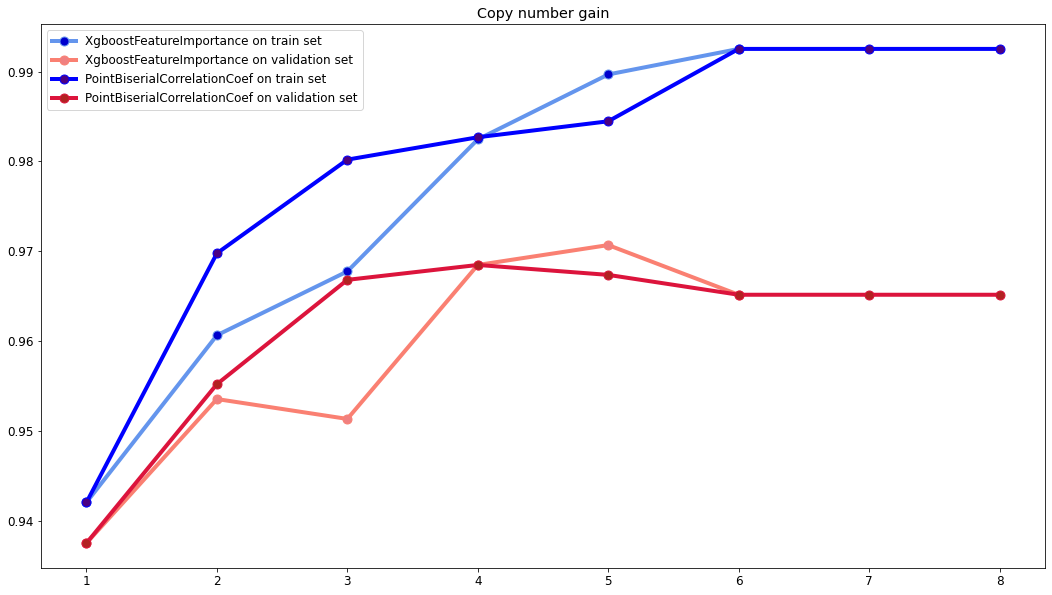

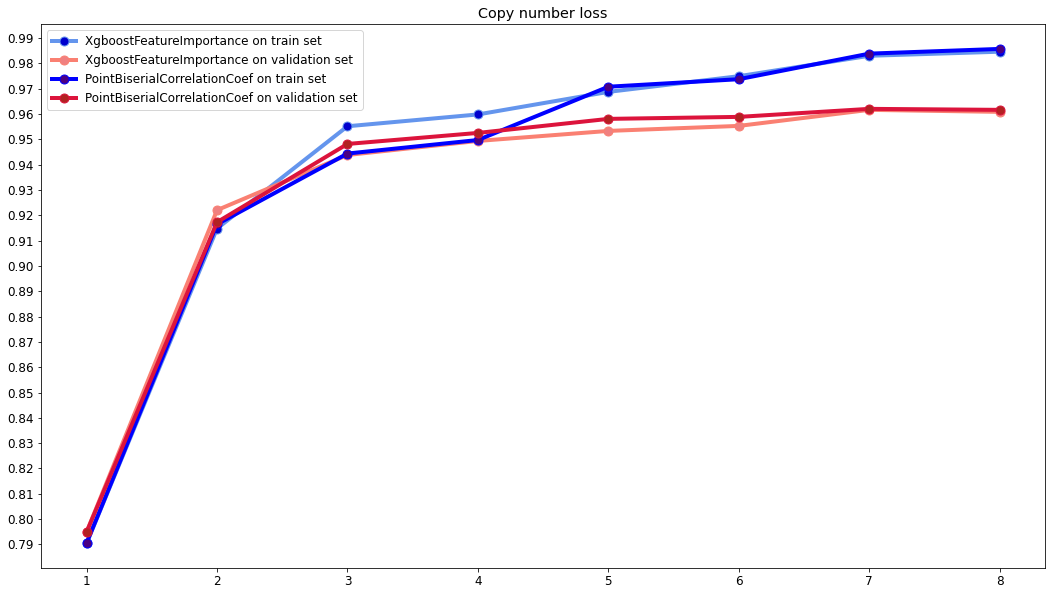

In [63]:
# spojenie FI z xgboostu a point biserial corr coef
cnv_types = ['gain', 'loss']
for cnv_type in cnv_types:
    
    FI_accuracy_fn = './results_isv_annotsv/attributes_selection/feature_importance_trainig_selected_attributes_accuracy_'+ cnv_type +'_len1000.tsv'
    FI_accuracy = pd.read_csv(FI_accuracy_fn, sep='\t')
    
    PBC_accuracy_fn = './results_isv_annotsv/attributes_selection/pointBiserialCorrelation_trainig_selected_attributes_accuracy_'+ cnv_type +'_len1000.tsv'
    PBC_accuracy = pd.read_csv(PBC_accuracy_fn, sep='\t')
    
    # zlepenie
    fi_pbc = pd.concat([FI_accuracy.TrainAccuracy, FI_accuracy.ValidationAccuracy, PBC_accuracy.TrainAccuracy, PBC_accuracy.ValidationAccuracy, PBC_accuracy.NumberOfAttributes], axis=1)
    fi_pbc.columns = ['TrainAccuracy_FeatureImportance', 'ValidationAccuracy_FeatureImportance','TrainAccuracy_PointBiserialCoef','ValidationAccuracy_PointBiserialCoef', 'NumberOfAttributes']

    # zvizualizuj na grafe:
    plt.figure(figsize=(18, 10))
    plt.yticks(np.arange(round(PBC_accuracy.TrainAccuracy.min(), 2), 1.1, 0.01))
#     if cnv_type == 'gain':
#         plt.xticks(np.arange(1, 7, 1))
#     else:
#         plt.xticks(np.arange(1, 9, 1))
    plt.plot( 'NumberOfAttributes', 'TrainAccuracy_FeatureImportance', data=fi_pbc, marker='o', markerfacecolor='mediumblue', markersize=9, color='cornflowerblue', linewidth=4, label = 'XgboostFeatureImportance on train set')
    plt.plot( 'NumberOfAttributes', 'ValidationAccuracy_FeatureImportance', data=fi_pbc, marker='o', markerfacecolor='lightcoral', markersize=9, color='salmon', linewidth=4, label = 'XgboostFeatureImportance on validation set')

    plt.plot( 'NumberOfAttributes', 'TrainAccuracy_PointBiserialCoef', data=fi_pbc, marker='o', markerfacecolor='indigo', markersize=9, color='blue', linewidth=4, label = 'PointBiserialCorrelationCoef on train set')
    plt.plot( 'NumberOfAttributes', 'ValidationAccuracy_PointBiserialCoef', data=fi_pbc, marker='o', markerfacecolor='firebrick', markersize=9, color='crimson', linewidth=4, label = 'PointBiserialCorrelationCoef on validation set')


    plt_title = 'Copy number '  + cnv_type

    plt.title(plt_title)
    plt.legend()
    
    fn_to_savefig = './results_isv_annotsv/attributes_selection/pointBiserialCorrelation_and_xgboostFI_accuracy_'+ cnv_type +'_len1000.jpg'
    plt.savefig(fn_to_savefig, dpi=300, format='jpg', bbox_inches = 'tight', facecolor='white')


In [66]:
FI_accuracy_fn = './results_isv_annotsv/attributes_selection/feature_importance_gain_len1000.tsv'
FI_accuracy = pd.read_csv(FI_accuracy_fn, sep='\t')
FI_accuracy

,RFE_importance,Attribute,feature_importance
0,1,gene_count,0.588524
1,3,ExAC_zScore_pLI,0.136841
2,2,morbidGene_count,0.130124
3,4,length,0.070005
4,5,ExAC_zScore_indel,0.038139
5,6,min_D_Frequency_3,0.036367


In [37]:
PBC_accuracy.TrainAccuracy.min()

0.7979221191212625

In [32]:
for index, row in fi_con.iterrows():
    g.text(row.Attribute,row.feature_importance, round(row.feature_importance,2), color='black', ha="center")
